-ATSNA ALSYA FADILLAH 
-09011281722035 SK5A

In [ ]:
#IMPLEMENTASI FUZZY PADA PERMAINAN KARTU CAPSA

In [1]:
import numpy as np 
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [2]:
JKP = np.arange(1,16,1)
JKPS = np.arange(1,16,1)

keterangan :
    - JKP = Jumlah kartu player
    - JKPS= jumlah kartu player paling sedikit
    - KTD = Kartu Tertinggi Yang Dikeluarkan

# Fuzzification

In [ ]:
#dibawah ini menunjukan tiga grafik fuzzy , JKP ,JKPS, KTD

In [3]:
JKP = ctrl.Antecedent(np.arange(1,16,1), 'JKP')
JKPS = ctrl.Antecedent(np.arange(1,16,1), 'JKPS')
KTD = ctrl.Consequent(np.arange(1,16,1), 'KTD')


In [4]:
JKP ['rendah'] = fuzz.trapmf(JKP.universe, [1,1,5,8])
JKP ['sedang'] = fuzz.trimf(JKP.universe, [5,8,13])
JKP ['tinggi'] = fuzz.trapmf(JKP.universe, [8,13,15,15])

JKPS ['rendah'] = fuzz.trapmf(JKPS.universe, [1,1,5,8])
JKPS ['sedang'] = fuzz.trapmf(JKPS.universe, [5,8,10,13])
JKPS ['tinggi'] = fuzz.trapmf(JKPS.universe, [10,13,15,15])


KTD['low'] = fuzz.trapmf(KTD.universe, [1,1,6,9])
KTD['medium'] = fuzz.trimf(KTD.universe, [6,9,13])
KTD['high'] = fuzz.trapmf(KTD.universe, [9,13,15,15])

In [ ]:
#grafik fuzzy dari Jumlah Kartu Player (JKP) 

C:\Users\NOM\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


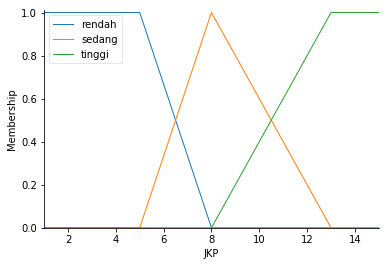

In [5]:
JKP.view()

In [ ]:
#grafik fuzzy Jumlah Kartu Player Paling Sedikit (JKPS)

C:\Users\NOM\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


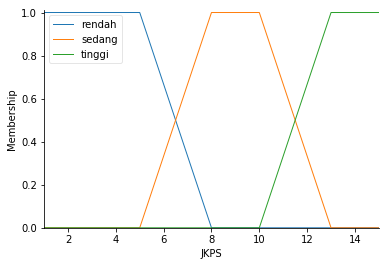

In [6]:
JKPS.view()

In [ ]:
#grafik fuzzy angka kartu tertinggi yang dikeluarkan

C:\Users\NOM\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


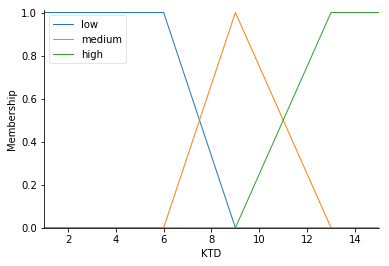

In [7]:
KTD.view()

# Inferencing

In [ ]:
#JKP = JUMLAH KARTU PEMAIN
#JKPS= JUMLAH KARTU PEMAIN YANG PALING SEDIKIT
#KDT = ANGKA KARTU TERTINGGI YANG DIPERBOLEHKAN

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7331f3f28>)

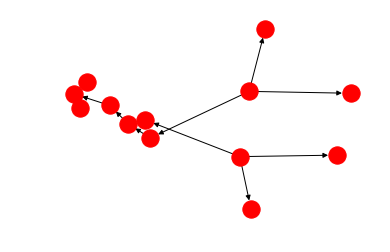

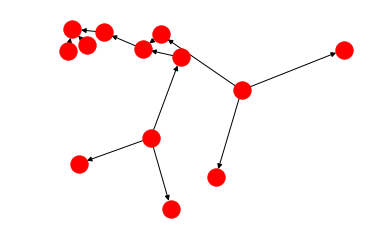

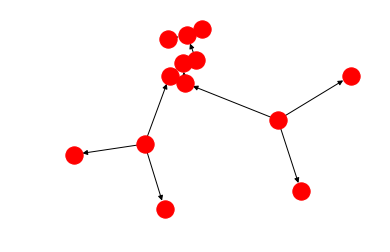

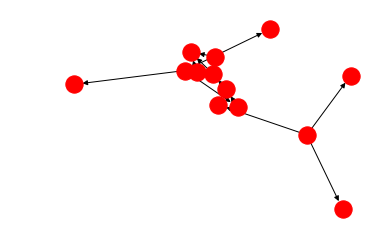

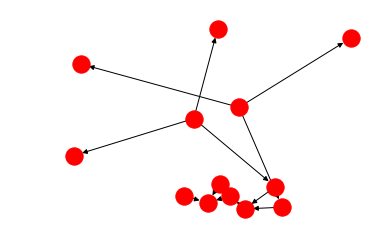

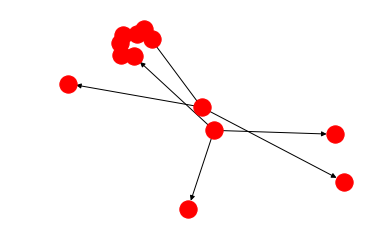

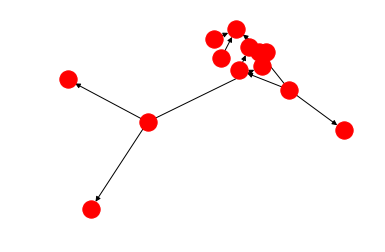

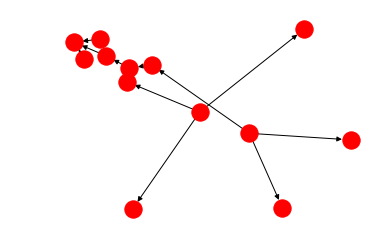

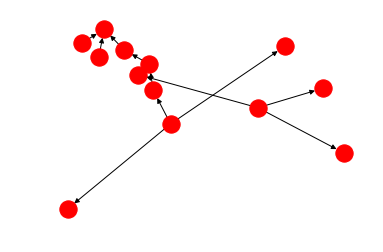

In [8]:
rule1 = ctrl.Rule(JKP['rendah'] & JKPS['tinggi'], KTD['medium'])
rule2 = ctrl.Rule(JKP['sedang'] & JKPS['tinggi'], KTD['medium'])
rule3 = ctrl.Rule(JKP['tinggi'] & JKPS['tinggi'], KTD['high'])

rule4 = ctrl.Rule(JKP['rendah'] & JKPS['sedang'], KTD['high'])
rule5 = ctrl.Rule(JKP['sedang'] & JKPS['sedang'], KTD['high'])
rule6 = ctrl.Rule(JKP['tinggi'] & JKPS['sedang'], KTD['medium'])

rule7 = ctrl.Rule(JKP['rendah'] & JKPS['rendah'], KTD['medium'])
rule8 = ctrl.Rule(JKP['sedang'] & JKPS['rendah'], KTD['low'])
rule9 = ctrl.Rule(JKP['tinggi'] & JKPS['rendah'], KTD['low'])

rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()

In [2]:
#pada fuzzy ini akan dibandingkan jumlah kartu dari player pada turn tersebut
#dan jumlah kartu paling sedikit dari empat player yang bermain

# Rule Evaluation

In [9]:
agregat_rule = ctrl.ControlSystem([rule1, rule2, rule3, 
                                   rule4, rule5, rule6, rule7, rule8, rule9])

# Defuzzification

In [ ]:
#merupakan sistem pengolahan output atau mapping dari fuzzy set menjadi crisp set

In [10]:
Kartu_Tertinggi = ctrl.ControlSystemSimulation(agregat_rule)

In [11]:
Kartu_Tertinggi.input["JKP"] = 5
Kartu_Tertinggi.input["JKPS"] = 2

In [12]:
Kartu_Tertinggi.compute()
Kartu_Tertinggi.output

OrderedDict([('KTD', 9.333333333333332)])

C:\Users\NOM\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


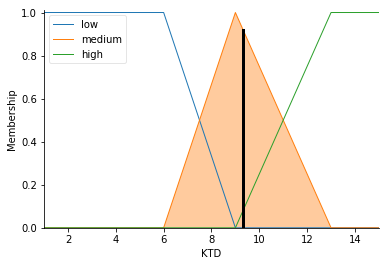

In [13]:
KTD.view(sim=Kartu_Tertinggi)

# Perhitungan Manual

\begin{equation}
    JKP = 5 \\
    Masukkan\,nilai\,suhu\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,Harga\,Baru\\
 \mu ['Rendah'](x) = \begin{cases}
    1, & \text{$x\leq5 $}.\\
    (8 - x)/(8 - 5) , & \text{$5 \leq x \leq 8$}.\\
    0, & \text{$x\geq 8$}.\checkmark \\
  \end{cases}
  \\
  \mu['sedang'](x)=\begin{cases}
    0, & \text{$x\leq 5 $ atau $x\geq13$}.\\
    (x - 5)/(8 - 5) , & \text{$5 \leq x \leq 8$}.\\
    (13- x)/(13 - 8) , & \text{$8 \leq x \leq 13$}. \\
  \end{cases}
  \\
  \mu ['Tinggi'](x)=\begin{cases}
    0, & \text{$x\leq 8 $}.\\
    (x - 8)/(13 - 8) , & \text{$8 \leq x \leq 13$}.\\
    1, & \text{$x\geq 15$}.
  \end{cases}
\end{equation}


\begin{equation}
    \mu Rendah(5) = (b - x) / (b - a) \\
    \mu Rendah(5) = (8 - 5 ) / (8 - 5) \\
    \mu rendah(5) = 1 \\
\end{equation}

\begin{equation}
    JKPS = 2 \\
    Masukkan\,nilai\,suhu\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,Harga\,Baru\\
 \mu ['Rendah'](x) = \begin{cases}
    1, & \text{$x\leq5$}.\\
    (8 - x)/(8 - 5) , & \text{$5 \leq x \leq 8$}.\\
    0, & \text{$x\geq 8$}.\checkmark \\
  \end{cases}
  \\
  \mu['Normal'](x)=\begin{cases}
    0, & \text{$x\leq 5 $ atau $x\geq13$}.\\
    (x - 5)/(9 -5) , & \text{$5 \leq x \leq 5$}.\\
    (13- x)/(13- 9) , & \text{$9 \leq x \leq 13$}. \\
  \end{cases}
  \\
  \mu ['Tinggi'](x)=\begin{cases}
    0, & \text{$x\leq 10$}.\\
    (x - 10)/(13 - 10) , & \text{$10 \leq x \leq 13$}.\\
    1, & \text{$x\geq 15$}.
  \end{cases}
\end{equation}


\begin{equation}
    \mu Rendah(5) = (b - x) / (b - a) \\
    \mu Rendah(5) = (8 - 2 ) / (8 - 2) \\
    \mu rendah(5) = 1 \\
\end{equation}

Mencari nilai terkecil dari evaluasi rule 
1. IF JKP rendah AND JKPS Rendah THEN KTD low

$$ \\ \alpha(predikat_1) = \mu JKP\ Rendah \cap \mu JKPS\ Rendah $$
$$\alpha(predikat_1)   = min (\mu JKP[5], \mu JKPS[2], $$
$$ \alpha(predikat_1) = min (1 ; 1) $$
$$ \alpha(predikat_1) = 1 $$

Mencari nilai Xi dan Ai untuk output Harga Jual
Berada Pada Rendah 

$$
X1 = 6 + \frac{2}{3} (9-6) \\
X2 = 8 \\
$$

$$
X2 = 9 + \frac{1}{3} (13-9) \\
X2 = 10,33 \\
$$

$$
A2 = \frac{1}{2}\ (3\ x\ 1) \\
A2 = 1,25 \\ 
$$

$$
A2 = \frac{1}{2}\ (4\ x\ 1) \\
A2 = 2\\ 
$$

$$
Hasil = \frac{\Sigma\ Xi\ Ai}{Ai}  
$$

$$
Hasil = \frac{(8\ x\ 1,5)\ +\ (10,33 x 2)}{1,5\ +\ 2} \\
Hasil = \frac{32}{3,5} \\
Hasil = 9,33333
$$

Hasil perhitungan manual dengan perhitungan python Sama sama 9,33333